In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in the original data
im = fits.open('/Users/mr82/data/CloudCovErr/data/decaps/c4d_170119_085651_ooi_r_v1.fits.fz')
# read in the modified data
mod_dat = fits.open('/Users/mr82/data/CloudCovErr/data/decaps/mod/c4d_170119_085651_ooi_r_v1.mod.fits')

In [3]:
# how many extensions in the original data?
len(im)

61

In [4]:
# how many extensions in the modified data?
len(mod_dat)

428

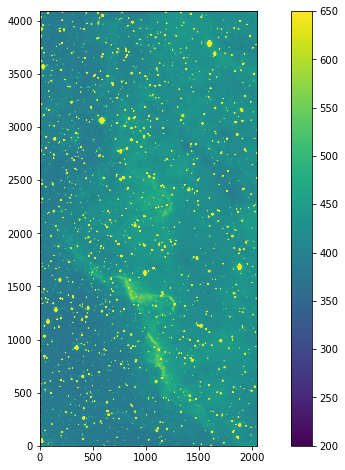

In [13]:
# display the original 'N14' image
plt.figure(figsize=(12,8))
plt.imshow(im[44].data, origin='lower', vmin=200, vmax=650)
plt.colorbar()

In [16]:
# what are the mod data? Look at the header to get an idea
mod_dat[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2017-01-26T23:37:52' / Date FITS file was generated                  
IRAF-TLM= '2017-01-27T14:58:14' / Time of last modification                     
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
OBJECT  = 'DECaPS_42036_r'     / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTCOPYRI,DTINSTRU,DTNSANAM,DTOB
COMMENT SERV,DTPI,DTPIAFFL,DTPROPID,DTSITE,DTTELESC,DTTITLE,INSTRUME,OBSERVAT,OB
COMMENT SID,OBSTYPE,PROCTYPE

In [ ]:
# extension '0' appears to describe the full dataset, first image in extension '1' 

In [15]:
# information on the mod data - note the 'EXTNA'
mod_dat[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2046 / Axis length                                    
NAXIS2  =                 4094 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ZDITHER0=                 9365 / dithering offset when quantizing floats        
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'S29_MOD '           / Extension name                                 
DATE    = '2017-01-26T23:37:52' / Date FITS file was generated                  
IRAF-TLM= '2017-01-26T23:38:28' / Time of last modification                     
INHERIT =                   

In [7]:
# I see the "_mod" added. Other files for this same portion of the sky? 

for num in range(1,10):
    print("index =", num, "tile = ", mod_dat[num].header['EXTNAME'])

index = 1 tile =  S29_MOD
index = 2 tile =  S29_SKY
index = 3 tile =  S29_MSK
index = 4 tile =  S29_PRN
index = 5 tile =  S29_PRL
index = 6 tile =  S29_PRR
index = 7 tile =  S29_PRE
index = 8 tile =  S31_MOD
index = 9 tile =  S31_SKY


In [8]:
# okay, 7 files for each position on the sky 
# making an (educated) guess about where the 'N14' files will start 
mod_dat[302].header['EXTNAME']

'N14_MOD'

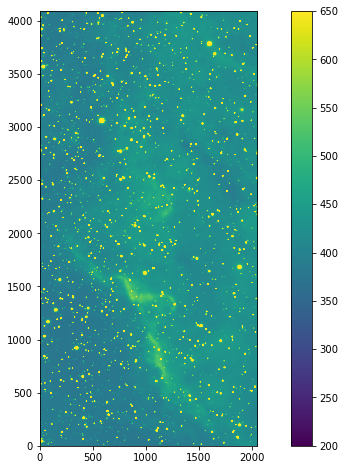

In [14]:
# let's take a look 
plt.figure(figsize=(12,8))
plt.imshow(mod_dat[302].data, origin='lower', vmin=200, vmax=650)
plt.colorbar()

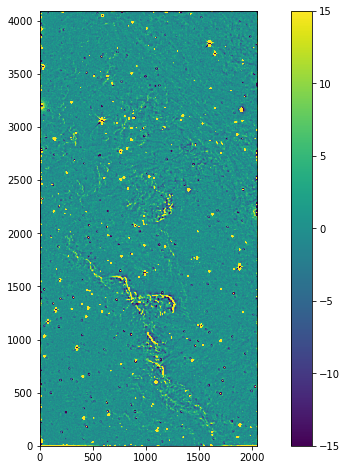

In [10]:
# that looks quite a lot like the original image at first glance. 
# Is it actually modified?

# take the difference of the two images to check 
diff = im[44].data - mod_dat[302].data

# display 
plt.figure(figsize=(12,8))
plt.imshow(diff, origin='lower', vmin=-15, vmax=15)
plt.colorbar()